# Проект  "Анализ компьютерных игр для планирования рекламной компании. Проверка гипотез"

### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***1. Открываем файл с данными и изучаем общую информацию***

In [3]:
import pandas as pd
#открывем файл
data = pd.read_csv('/datasets/games.csv')
#выводим на печать первые 5 строк
print(data.head(5))

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


В названиях колонок встречаются буквы с разными регистрами. Для удобства необходимо будет далее их все переести  нижнему регистру.

In [4]:
#общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть пропуски, в дальнейшем необходимо будет их обработать:
- Name - удалить строки, где не указано название игры;
- Year_of_Release - поставить 0 вместо пропусков
- Genre

***2. Проводим предобработку данных***

In [5]:
#предобработка данных
#приведение названия столбцов к нижнему регистру


data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
#преобразование типов данных
#проверка на неявные дубликаты в значениях
print(data['name'].unique())
print(data['platform'].unique())
data.isna().sum()

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

При проверке пропусков в данных по колонках, обнаружены пропуски и что будем делать:
- name - удаляем строки с пропусками,так как для анализа игры критически важно их название
- year_of_release - удаляем сроки( их немного), чтобы можено было анализировать данные по годам
- genre -  удаляем сроки( их немного), так как найти им логичную замену невозможно и чтобы можено было анализировать данные по жанрам.
- critic_score и user_score- пропуком много, поэтому рассчитаем медианту по жандр игр, оценка можеь быть пропущено, т.к. игру еще не оценили или она могла выйти недавно
- rating - колонок много, удалять не будет, но постаим вместо пропуском "не определен"

In [7]:
#удаление и замена пропусков в данных 
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['genre'])

data['rating'] = data['rating'].fillna('неопределен')

data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)

#замена значения 'tbd' =  'to be discussed',  что означает подлежит обсуждению
data.loc[(data['user_score'] == 'tbd'), 'user_score'] = '0'

#преобразование типов данных

data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [59]:
#заменяем на медианы пропуски в колонках critic_score  и user_score

# перебираем  жанры тип в наборе уникальных значений столбца genre
#for g in data['genre'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в genre текущий тип жанры (g) и есть пропуски в critic_score 
 #   data.loc[(data['genre'] == g) & (data['critic_score'] == '0.'), 'critic_score'] = \
  #  data.loc[(data['genre'] == g), 'critic_score'].mean()
    # и записываем в них среднее значение user_scoreсреди строк с текущим жанром игры (g)

#for g in data['genre'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в genre текущий тип жанры (g) и есть пропуски в user_score 
 #   data.loc[(data['genre'] == g) & (data['user_score'] == '0.'), 'user_score'] = \
  #  data.loc[(data['genre'] == g), 'user_score'].mean()
    # и записываем в них среднее значение user_score среди строк с текущим жанром игры (g)


Удаляме строки без названия игр, так как нам нужно определить успешаные игры, а для этогоих название критически необходимо.

В списке значений есть 'tbd' -  что означает 'to be discussed' -  под обсуждение, то есть ретйинга сейчас нет.
Поэтому значение 'tbd' - в целях анализа заменим на ноль.

Вместо пропуском в колонке rating вносим нули, так как рейтинг присваивает ESRB неверно будет заменять отсутствующие данные средними значениями по группе.  

***Подсчет суммарных продаж во всех регионах***

In [48]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,неопределен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,неопределен,31.38


In [60]:
#исследовательский анализ данных

#посмотрим, сколько игр выпускалось в разные годы

print( data.groupby('year_of_release')['name'].count())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


По таблице видим, что до 2010 выпуск числа игр рос, далее после всплеска в 2010 года, начался резкий спад, в 2014-2016 наблюдает рост, потом срова небольшое падение.

Для прогнозирования будущих рекламыех компаний, нам важны данные за последние 2 года 2015 и 2016, так как именнро в эти годы будут наибоолее актуальыне данные.

In [11]:
data_year = data.pivot_table(index = 'year_of_release', columns= "platform", values = 'total_sales', aggfunc = 'sum')

display(data_year)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


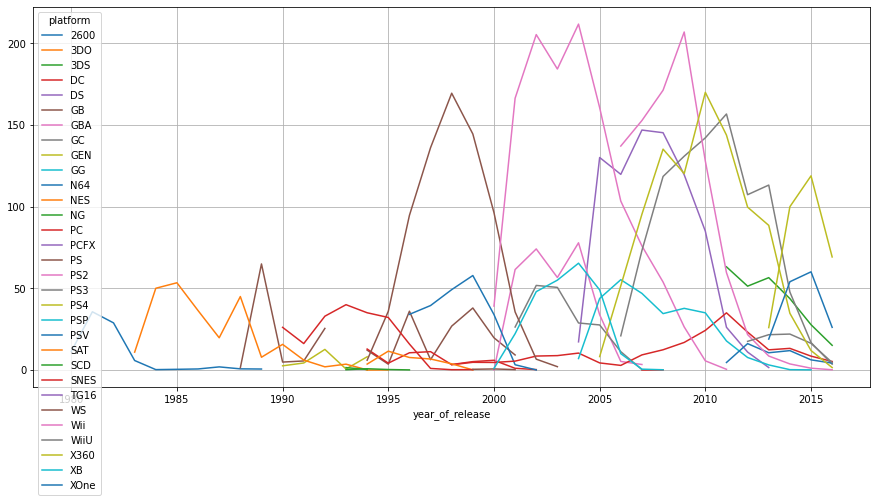

In [12]:
import matplotlib.pyplot as plt
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

По графику видео, что новые платформы появляются регулярно.

По таблице выше можно заметить, что успешные платформы живут от 7-10 лет, например "2600" и  " Wii",  исть и такие что живту по 2-3 года, например, " SCD" и "WS".Скорее всего это свящано с популярностью иигроков.
Старые платформы исчезают постепенно.

***Для прогноза на 2017 год возмем данные за 2015-2016 года***

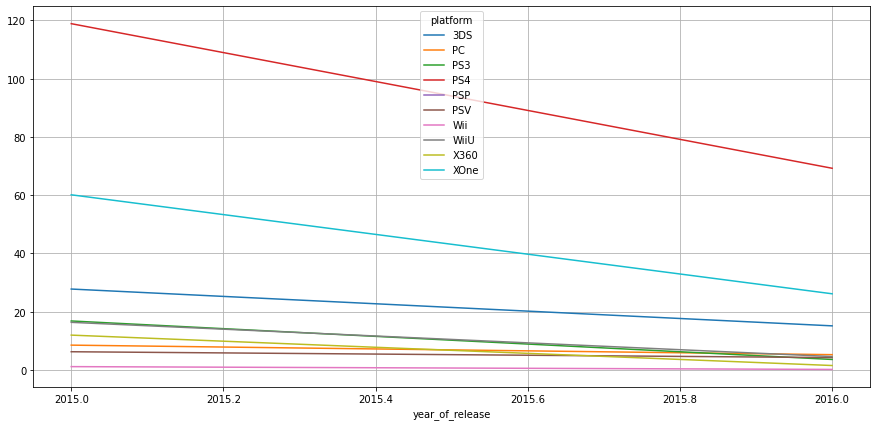

In [13]:
#как менялись продажи по платформам в 2015 и 2016 годах

data1 = data.query("2015 <= year_of_release <= 2016")
import matplotlib.pyplot as plt
#построим график распределения по годам
data1.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()


По графику видно, что продаж в последние 2 года стремительно сокращаются по всем платформам.
Только по 3 из них показатели суммарных продаж достаточно большие. Это платформы:PS4, XOne, 3DS.
По остальным же показатель стремится к нулю.

In [66]:
# суммируем столбцы продаж по весем годам 
data.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()


,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
2600,80.78,4.86,0.00,0.84,86.48
3DO,0.00,0.00,0.10,0.00,0.10
3DS,82.65,61.27,100.62,13.27,257.81
DC,5.43,1.69,8.56,0.27,15.95
DS,380.31,188.41,175.02,59.04,802.78
GB,113.64,47.51,85.12,8.16,254.43
GBA,184.12,74.59,46.56,7.61,312.88
GC,131.94,38.32,21.34,5.13,196.73
GEN,19.27,5.52,2.67,0.89,28.35


***Потенциально прибыльные платформы***

По общим данным наиболее крупные продажи  по всем годам у платформ PS4, XOne и 3DS.
Возьмем их для анализа, как самые продаваемые  и новые игры.

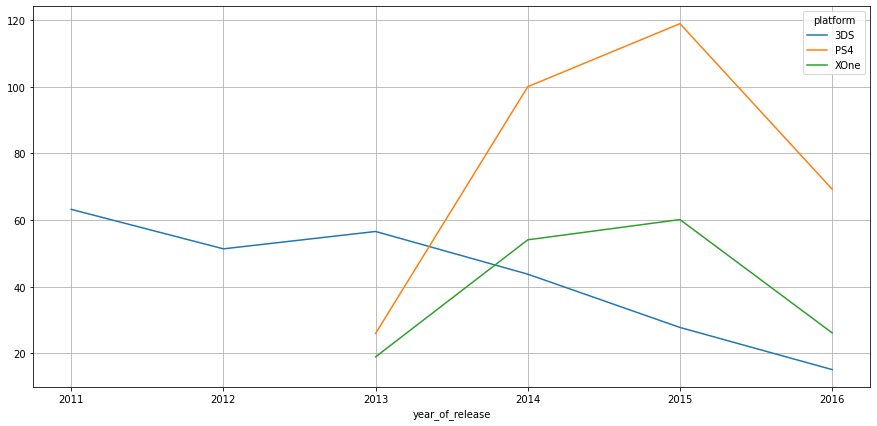

In [15]:
#построим график распределения по годам
data1 = data.query('platform == ["XOne", "PS4", "3DS"]')

data1.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

 Рассмотрев данимику PS4, XOne и 3DS с 2011 по 2016 год по размеру выручки, принято решение убрать из анализа платформу 3DS, так как выручка по ней с 2013 идет на убыль, скорее всег платформа устарела.
 Будем рассмтривтаь для прогноза 2 более современные платформы:XOne и PS4.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

#берем сред данных по выбранным 2 платформам за 2015 и 2016 год
data1 = data1.query('platform != "3DS"')

#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат
data1.groupby('platform')['total_sales'].describe()



,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


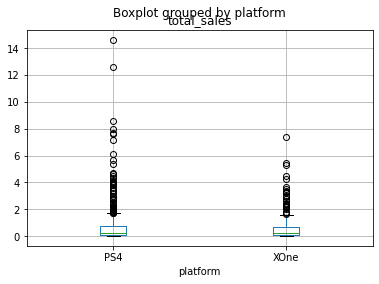

In [17]:
#общая диаграмму размаха
data1.boxplot(column='total_sales', by='platform')
plt.show() 

По общуй диаграмме размаха видны частые выбросы и редкие. Данные выбросы решено оставить, т.к. есть игры, которые могли иметь большие продажи.

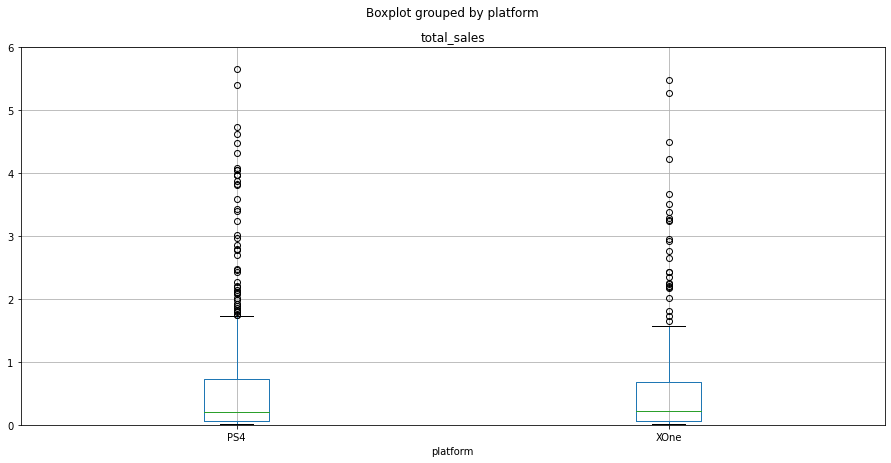

In [71]:
# сужаем диапазон до 6 млн продаж
data1.boxplot(column='total_sales', by='platform', figsize=(15,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 6)
plt.show()

Посмотрим влияние на продажи внутри платформы PS4 (так как она более крупная по рамеру выручки) 


Построим диаграмму рассеивания и посчитаем корреляцию между отзывами пользователей и критиков и продажами.


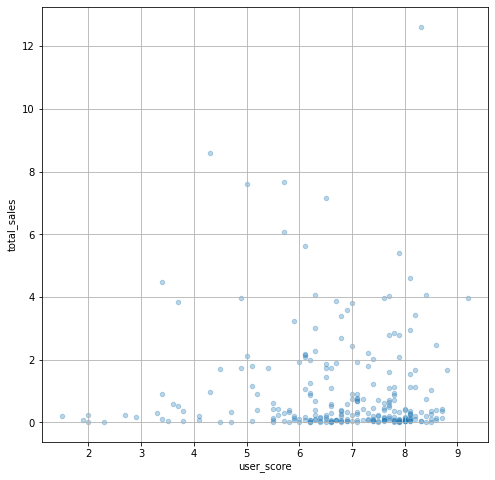

In [56]:
#диаграмма рассеивания по отзывам пользователей
data2 = data1.query('user_score != 0 and critic_score != 0')
data2[data2['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

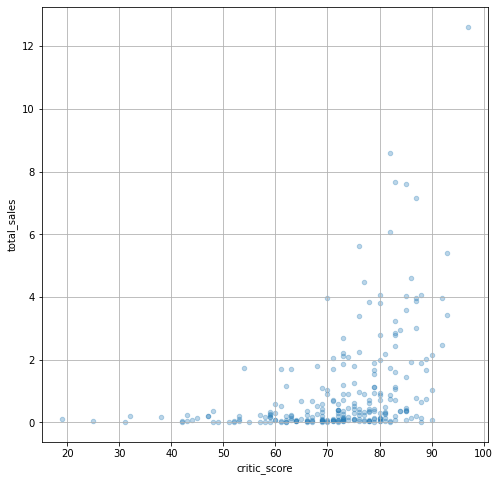

In [57]:
#диаграмма рассеивания по отзывам критиком
data2[data2['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

In [20]:
#корреляция между отывами и продажами
data_ps4 = data1[data1['platform']=='PS4']
data_ps4 = data_ps4[data_ps4['user_score'] != 0]
data_ps4 = data_ps4[data_ps4['critic_score'] != 0]
print('Коэффициент Пирсона между отзывами пользователей и продажами:', (data_ps4['user_score'].corr(data_ps4['total_sales'])))
print('Коэффициент Пирсона отзывами критиков и продажами:', (data_ps4['critic_score'].corr(data_ps4['total_sales'])))

Коэффициент Пирсона между отзывами пользователей и продажами: -0.03362497596528878
Коэффициент Пирсона отзывами критиков и продажами: 0.40589480145836687


Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки.

По данным из диаграммы рассеивания у имеем  слабо отрицательную корреляция  ~0.064 по отзывам покупателей и продажам.

И слабо положительная корреляцию ~ 0.393 по отзывам критиков и продажам.

***Сравним выводы с продажами игр на других платформах (по 2015-2016 гоа***


In [21]:
#data_all_pl -  срез основного файла по данным за 2015-2016гг.
data_all_pl = data.query('year_of_release >2014')
data_all_pl.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


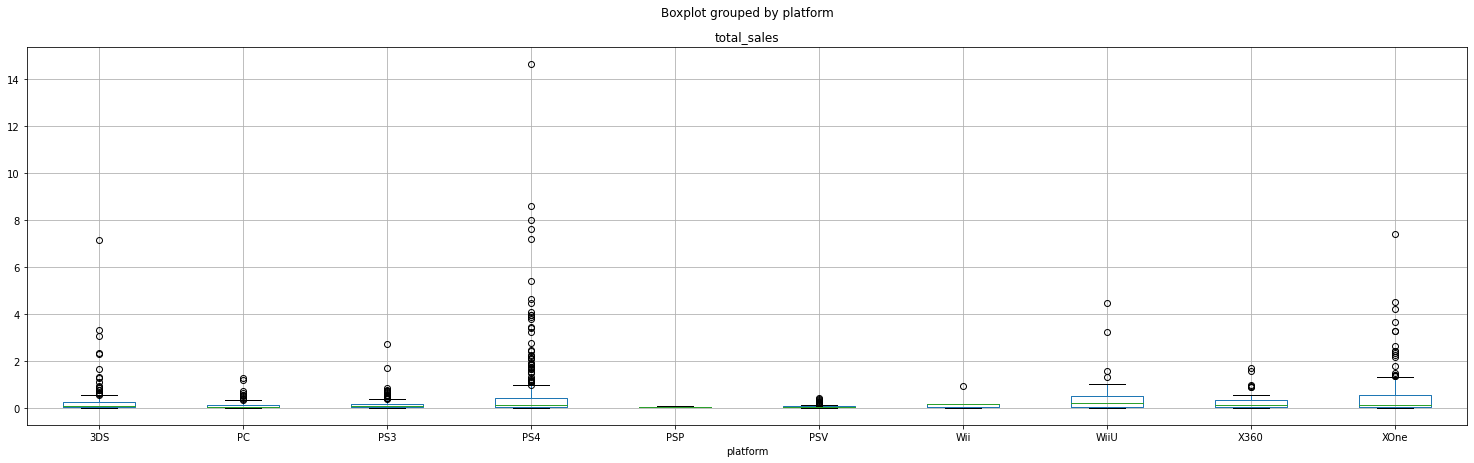

In [22]:
#выводим диаграмму размаха общего плана
data_all_pl.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.show()

В полученной диаграмме видим, что есть очень редкие выбросы с продажами в 80 млн (видимо эта игра была очень популярна), так же редкие, в отличии от других, выбросы есть в диапазоне от 20 до 40 млн. Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

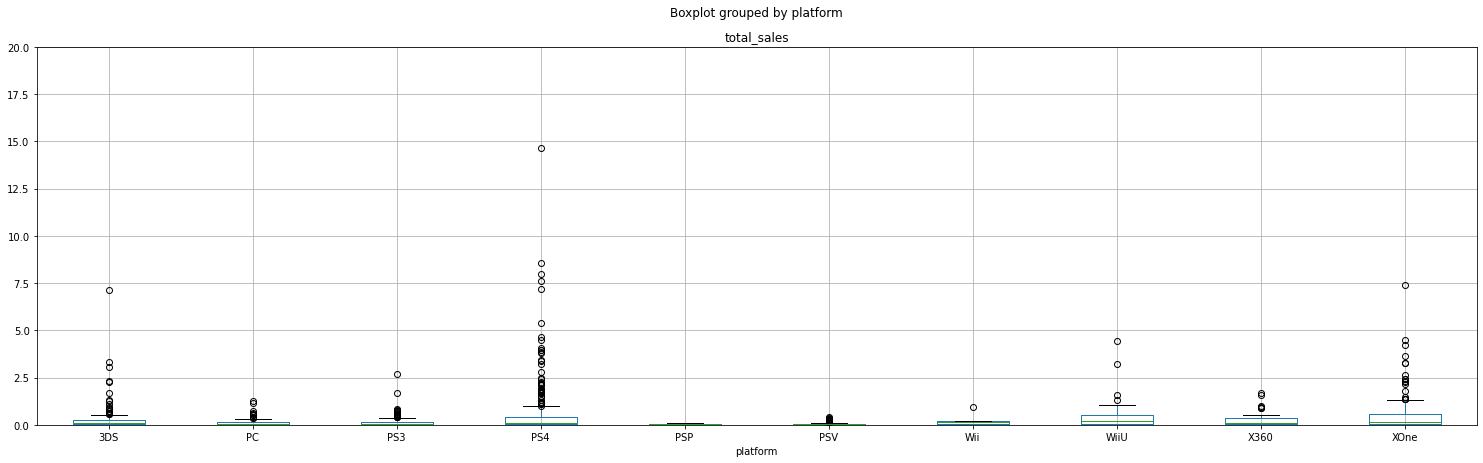

In [23]:
# теперь сужаем диапазон до 20 млн продаж
data_all_pl.boxplot(column='total_sales', by='platform', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 20)
plt.show()

В этой выгрузке так же у всех позиций есть редкие выбросы, что нам не нужно. Если и оставлять выбросы, то они должны быть максимально частыми, которые будут полезны статистике. Мы уже близки к нашей финальной визуализации.

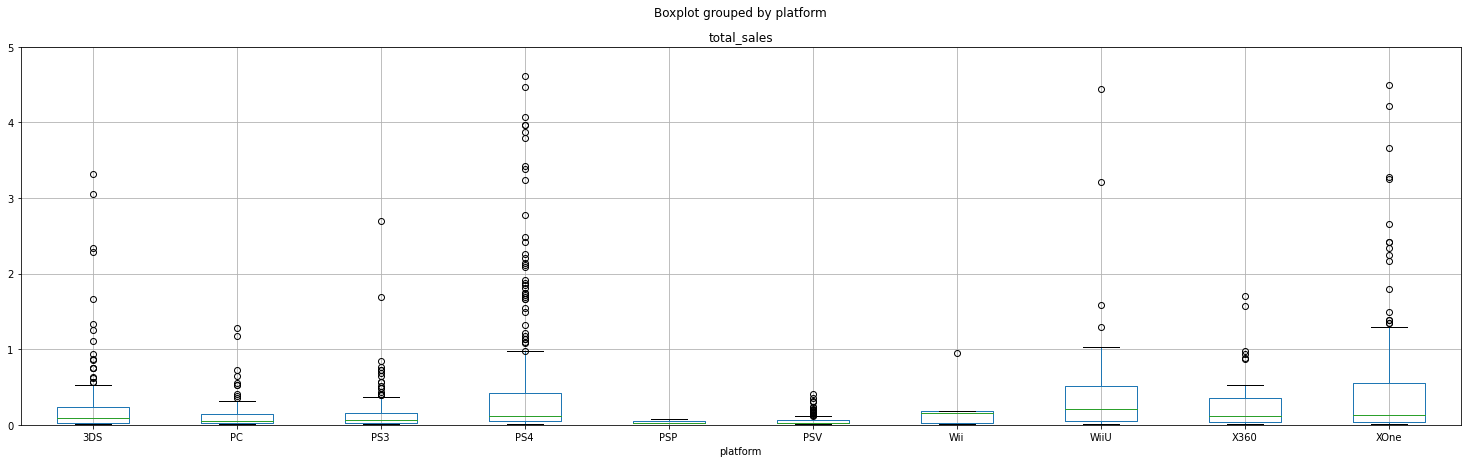

In [24]:
# сужаем диапазон до 5 млн продаж
data_all_pl.boxplot(column='total_sales', by='platform', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0, 5)
plt.show()

***Вывод***

Можем выделить несколько платформ, которые выделяются: PS и PS4 и XOne. Границы этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS и PS3, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

***Распределение игр по жанрам***

Какие жанры самые прибыльные? Жанры с высокими и низкими продажами.

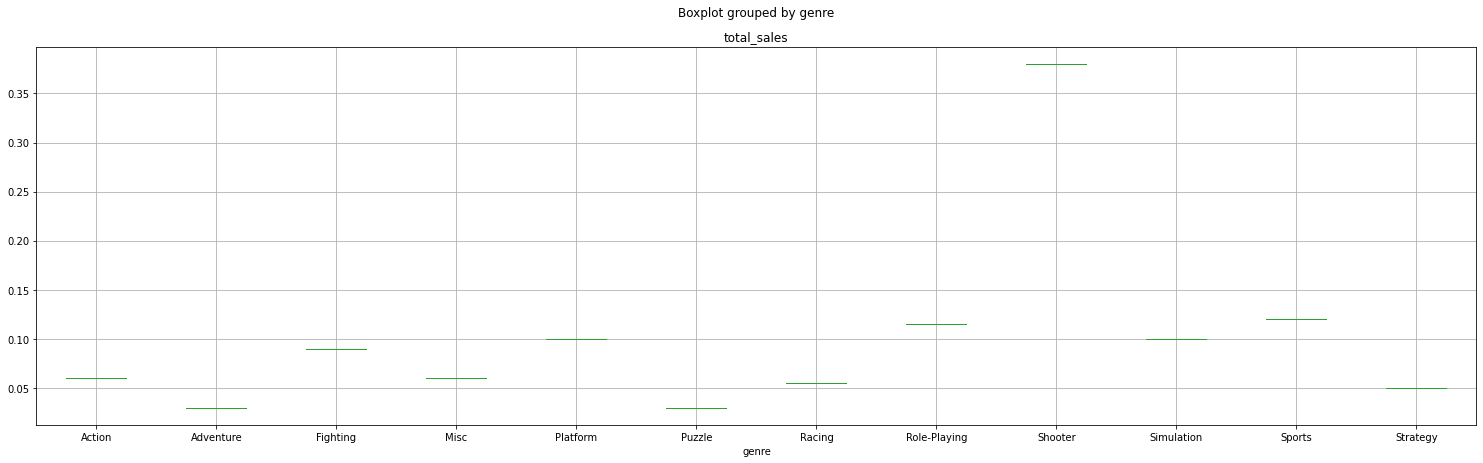

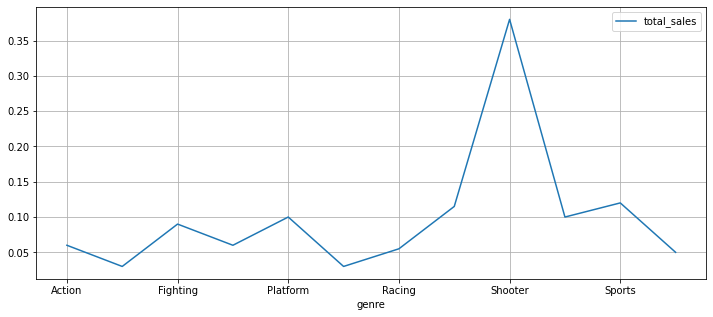

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [25]:
# посмотрим популярность жанров на всех платформах за все время
(
    data_all_pl.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .boxplot(column='total_sales', by='genre', figsize=(25,7))
)
plt.show()
(
data_all_pl.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)
plt.show()
data['genre'].unique()

В диаграмме мы можем выделить ТОП-5 популярных жанров:
1. Shooter
2. Sport
3. Role-Playing
4. Simuation
5. Platform

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Racing
4. Action

***Выводы по исследовательскому анализу данных***


Исследовательский анализ данных начали с того, что посчитаем количество выпущенных игр с группировкой по годам и платформам, а также подсчету выпучщнных игр по гоодам. Для прогноза были взяты года 2015-2016, так как последние в выборке и являются актуальными.

Далее посчитали суммарное количество продаж по каждой платформе в рамках 2015-2016гг. По изучению суммарных показателей мы можем выделить самые продаваемые платформы с продажами 40 млн и более. У нас вышли следующие платформы (PS4 и ХOne). Корректируем нашу выгрузку и оставляем в ней только эти позиции.

Теперь займемся построением графиков распределения.

Первый наш график будет показывать актуальность платформ по годам отталкиваясь от количество проданных игр. Подробное описание по данным графика вы можете почитать выше, под соответсвующим графиком.

Модели выпускались с периодичностью в год, в некоторых годах выпускало аж 2 платформы сразу.

Далее нам необходимо определить актуальные период, для того чтобы спрогнозировать последующие продажи. Установим актуальный период с 2006 по 2016 года. Данный период выбран в связи с тем, чтобы мы могла посмотреть какие платформы в принципе не будут продаваться. Если сделать период меньше, то часть данных будет урезана.

Можно выделить лидирующую платформу - PS4.

Далее мы оставляем все выбросы, т.к. они нам важны для дальнейшей аналитики.

Так же нам необходимо посмотреть на примере одной популярной платформы влияют ли отзывы критиков и покупателей на продажи. Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки, а график продаж мы вывели для того, чтобы показать что хорошие оценки покупателей и критиков соотносятся с продолжительными высокими продажами игр данной платформы. Так же мы выяснили, что по данным из диаграммы рассеивания у нас: корреляция слабо отрицательная: -0.06436843081030288
по оценкам критиков корреляция слабо положительная: 0.3920741369660568  

Далее сравнивались показатели продажи игр по всем. И в результе медианы прода по остальым играм не выходят на рамки 0.5 млн., на основании чего можно сделать вывод, что у отобранных платфом  PS4 и XOne есть намного больше игр, которые покупались намного чаще, чем на остальных платформах.

И последнее, сравним показатели по жанрам и выясним ТОП-5 популярных и непопулярных жанра по всем платформам.


Выяснилось следующее:

В диаграмме мы можем выделить ТОП-5 популярных жанров:
1. Shooter
2. Sport
3. Role-Playing
4. Simuation
5. Platform

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Racing
4. Action

***Портрет пользователя каждого региона***

Определиv для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5), различия в долях продаж.
- Самые популярные жанры (топ-5) их разница.
- Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе?

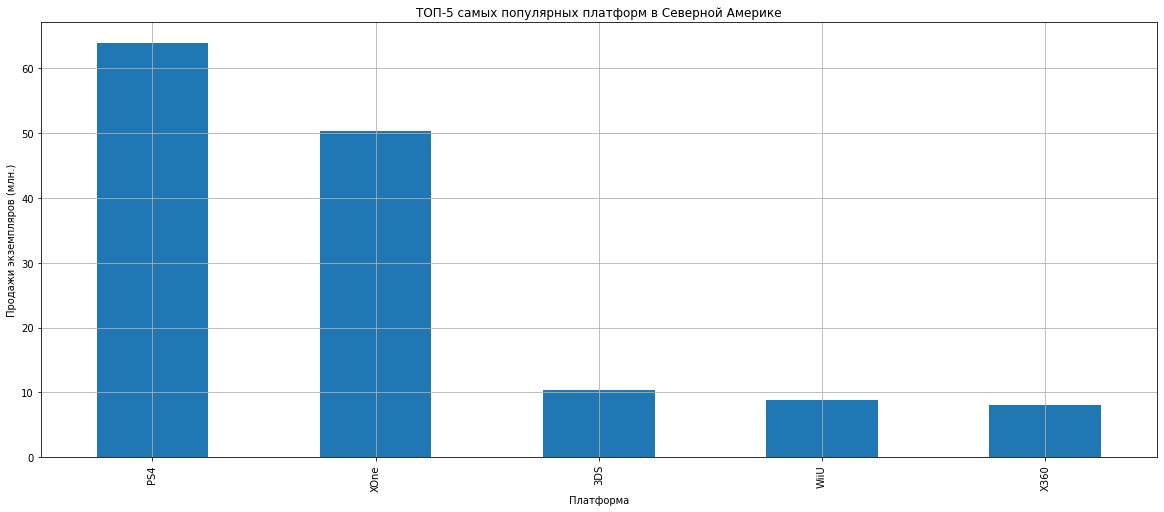

In [26]:
#cамые популярные платформы (топ-5), различия в долях продаж.
# ТОП-5 самых популярных платформ в Северной Америке по общей таблице
#группируем по платформе
platform_na_all = data_all_pl.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64


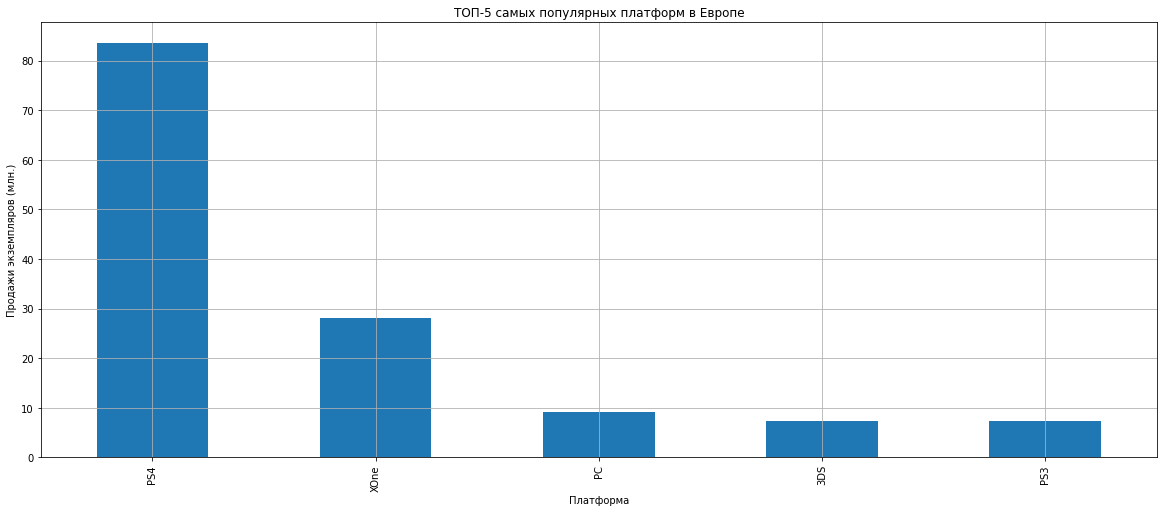

In [27]:
platform_eu_all = data_all_pl.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
print(platform_eu_all)
platform_eu_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

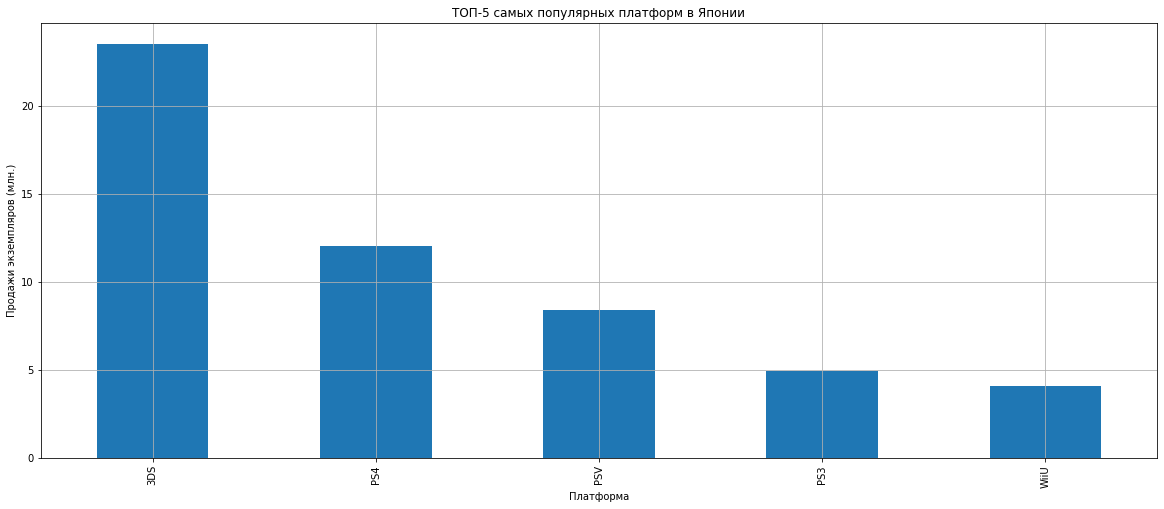

In [28]:
platform_jp_all = data_all_pl.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_jp_all.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

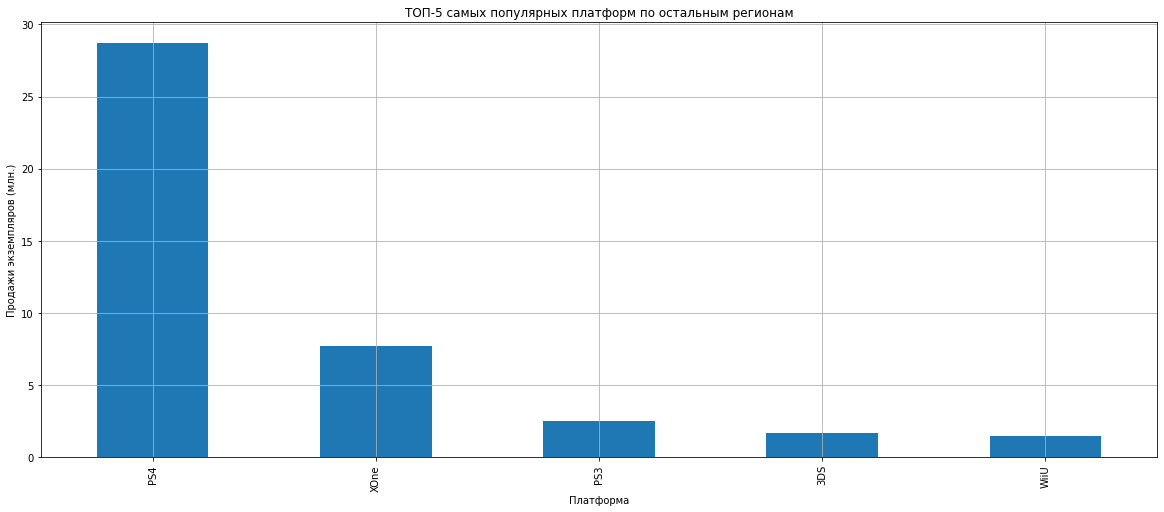

In [29]:
platform_oth = data_all_pl.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_oth.plot(x = 'platform', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ по остальным регионам')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [30]:
#доли продаж по регионам



***Выводы***

ТОП-5 самых популярных платформ в Северной Америке
- PS4
- XOne
- 3DS
- WiiU
- X360

ТОП-5 самых популярных платформ в Европе
- PS4
- XOne
- PC
- 3DS
- PS3

ТОП-5 самых популярных платформ в Японии
- 3DS
- PS4
- PSV
- PS3
- WiiU

ТОП-5 самых популярных платформ по остальынм регионам
- PS4
- XOne
- PS3
- 3DS
- WiiU

In [31]:
#различия в долях продаж

print('Доля продаж, приходящаяся на регион Сеерной Америки:',(data_all_pl['na_sales'].sum())/(data_all_pl['total_sales'].sum())*100)
print('Доля продаж, приходящаяся на регион Европа:',(data_all_pl['eu_sales'].sum())/(data_all_pl['total_sales'].sum())*100)
print('Доля продаж, приходящаяся на регион Япония:',(data_all_pl['jp_sales'].sum())/(data_all_pl['total_sales'].sum())*100)
print('Доля продаж, приходящаяся на прочие регионы:',(data_all_pl['other_sales'].sum())/(data_all_pl['total_sales'].sum())*100)

Доля продаж, приходящаяся на регион Сеерной Америки: 38.14585846401286
Доля продаж, приходящаяся на регион Европа: 37.17832730197024
Доля продаж, приходящаяся на регион Япония: 13.41978287092883
Доля продаж, приходящаяся на прочие регионы: 11.256031363088058


In [32]:
#доля продаж по ТОП-5 популярным платформам в Северной Америке
print('Доли продаж по ТОП-5 платформам в Северной Америке:')
print('PS4:', ((platform_na_all['PS4'].sum()/data_all_pl['na_sales'].sum())*100))
print('XOne:', ((platform_na_all['XOne'].sum()/data_all_pl['na_sales'].sum())*100))
print('3DS:', ((platform_na_all['3DS'].sum()/data_all_pl['na_sales'].sum())*100))
print('WiiU:', ((platform_na_all['WiiU'].sum()/data_all_pl['na_sales'].sum())*100))
print('X360:', ((platform_na_all['X360'].sum()/data_all_pl['na_sales'].sum())*100)) 



Доли продаж по ТОП-5 платформам в Северной Америке:
PS4: 42.07128269319459
XOne: 33.137887871401276
3DS: 6.792278806245472
WiiU: 5.837011660847221
X360: 5.303379669279925


In [33]:
print('Доли продаж по ТОП-5 платформам в Европе:')
print('PS4:', ((platform_eu_all['PS4'].sum()/data_all_pl['eu_sales'].sum())*100))
print('XOne:', ((platform_eu_all['XOne'].sum()/data_all_pl['eu_sales'].sum())*100))
print('PC:', ((platform_eu_all['PC'].sum()/data_all_pl['eu_sales'].sum())*100))
print('3DS:', ((platform_eu_all['3DS'].sum()/data_all_pl['eu_sales'].sum())*100))
print('PS3:', ((platform_eu_all['PS3'].sum()/data_all_pl['eu_sales'].sum())*100))

Доли продаж по ТОП-5 платформам в Европе:
PS4: 56.468838718399326
XOne: 18.994186832499665
PC: 6.151142355008772
3DS: 4.995268352034608
PS3: 4.934432878193859


In [34]:
print('Доли продаж по ТОП-5 платформам в Японии:')
print('3DS:', ((platform_jp_all['3DS'].sum()/data_all_pl['jp_sales'].sum())*100))
print('PS4:', ((platform_jp_all['PS4'].sum()/data_all_pl['jp_sales'].sum())*100))
print('PSV:', ((platform_jp_all['PSV'].sum()/data_all_pl['jp_sales'].sum())*100))
print('PS3:', ((platform_jp_all['PS3'].sum()/data_all_pl['jp_sales'].sum())*100))
print('WiiU:', ((platform_jp_all['WiiU'].sum()/data_all_pl['jp_sales'].sum())*100))

Доли продаж по ТОП-5 платформам в Японии:
3DS: 44.10112359550563
PS4: 22.565543071161017
PSV: 15.749063670411939
PS3: 9.307116104868902
WiiU: 7.715355805243443


In [35]:
print('Доли продаж по ТОП-5 платформам по прочим регионам:')
print('PS4:', ((platform_oth['PS4'].sum()/data_all_pl['other_sales'].sum())*100))
print('3DS:', ((platform_oth['3DS'].sum()/data_all_pl['other_sales'].sum())*100))
print('PS3:', ((platform_oth['PS3'].sum()/data_all_pl['other_sales'].sum())*100))
print('3DS', ((platform_oth['3DS'].sum()/data_all_pl['other_sales'].sum())*100))
print('WiiU:', ((platform_oth['WiiU'].sum()/data_all_pl['other_sales'].sum())*100))

Доли продаж по ТОП-5 платформам по прочим регионам:
PS4: 64.07680285778092
3DS: 3.728510828309892
PS3: 5.559276624246476
3DS 3.728510828309892
WiiU: 3.3043089975440956


***Вывод по ТОП-5 популярным платформам по регионам ***

ТОП-5 самых популярных платформ в Северной Америке
 
PS4: 42.07128269319459
XOne: 33.137887871401276
3DS: 6.792278806245472
WiiU: 5.837011660847221
X360: 5.303379669279925

Доли продаж по ТОП-5 платформам в Европе:
PS4: 56.468838718399326
XOne: 18.994186832499665
PC: 6.151142355008772
3DS: 4.995268352034608
PS3: 4.934432878193859

Доли продаж по ТОП-5 платформам в Японии:
3DS: 44.10112359550563
PS4: 22.565543071161017
PSV: 15.749063670411939
PS3: 9.307116104868902
WiiU: 7.715355805243443

Доли продаж по ТОП-5 платформам по прочим регионам:
PS4: 64.07680285778092
3DS: 3.728510828309892
PS3: 5.559276624246476
3DS 3.728510828309892
WiiU: 3.3043089975440956

Платформа PS4 является лидером продаж по 3 изучаемым регионам из 4: Северной Америке, Европе и прочим регинам. Доля продаж по этой платформе среди прочих платформ по региону от 42  до 64%.

На втором по популярности идет платфома  XOne в двух регионах - Северной Америке и Европе.

При это стоит отметить, что доля выручки по регионам в общем выручке:

Доля продаж, приходящаяся на регион Северной Америки: 38.14585846401286
Доля продаж, приходящаяся на регион Европа: 37.17832730197024
Доля продаж, приходящаяся на регион Япония: 13.41978287092883
Доля продаж, приходящаяся на прочие регионы: 11.256031363088058

Как видим, суммарно на регион Северной Америки и Европы приходится ~ 75,33%.
Поэтому при прогнозе выручки  и популярности продуктов стоит ориентироваться на вкусы рынков Сев.Америки и Европы.

***Рассмотрим какие самые популярные жанры (топ-5) по регионам.***

***ТОП-5 самых популярных жанров в Северной Америке (2015-2016 гг)***

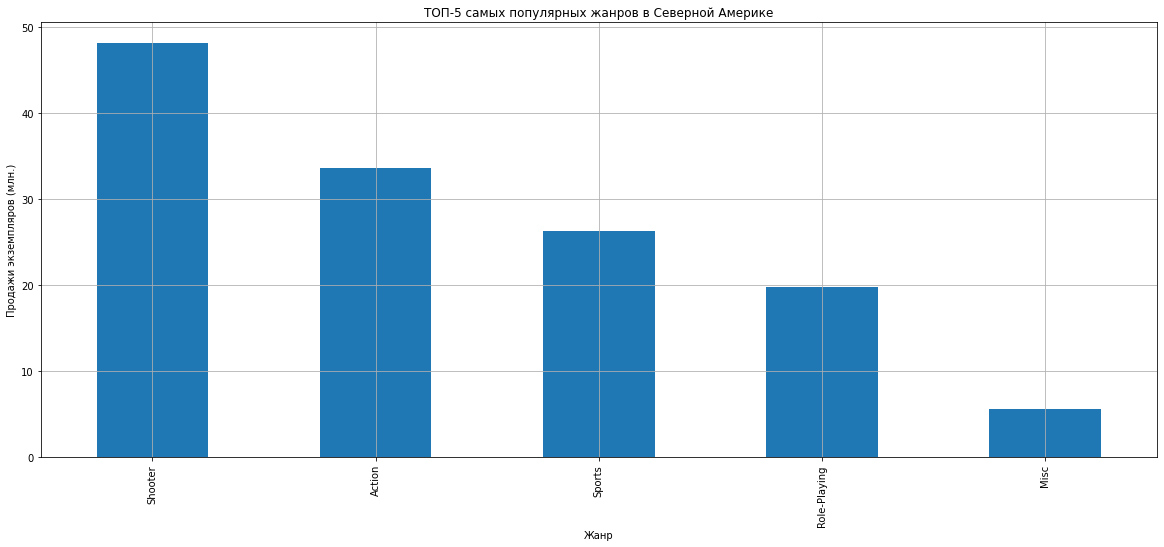

In [36]:
# ТОП-5 самых популярных жанров в  Северной Америке 
#группируем по жанрам
genre_na = data_all_pl.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

***ТОП-5 самых популярных жанров в  Европе (2015-2016 гг)***

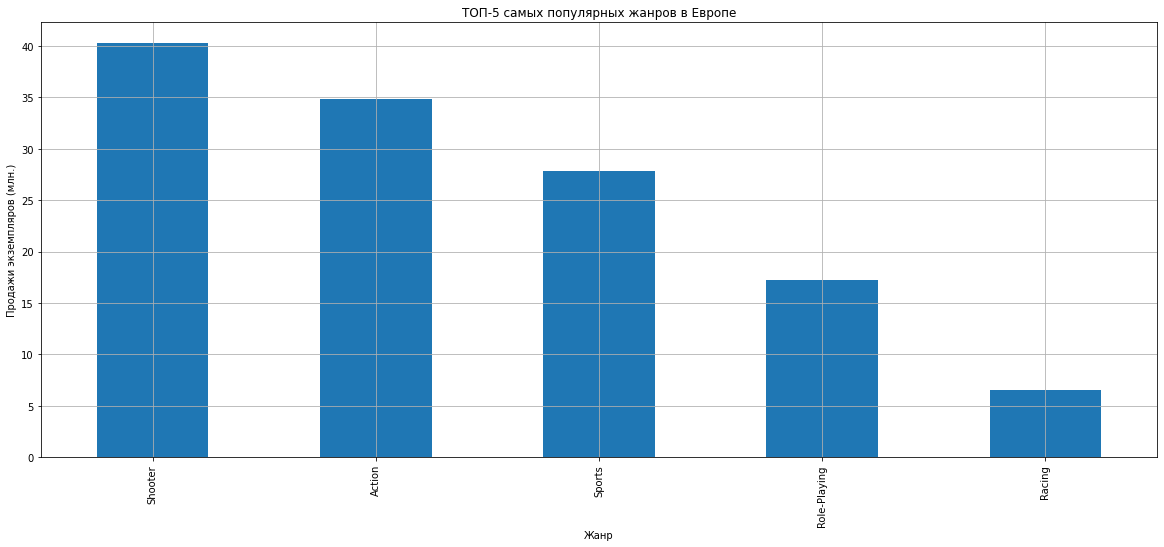

In [37]:
# ТОП-5 самых популярных жанров в Европе 
#группируем по жанрам
genre_eu = data_all_pl.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

***ТОП-5 самых популярных жанров в Японии (2015-2016 гг)***

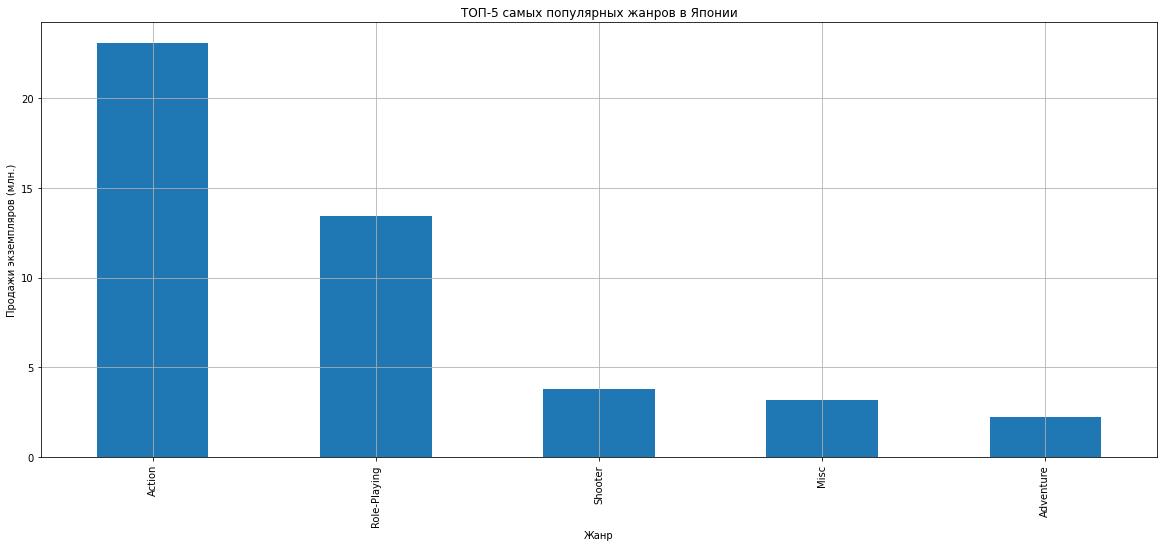

In [38]:
# ТОП-5 самых популярных жанров в  Японии 
#группируем по жанрам
genre_jp = data_all_pl.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_jp.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

***ТОП-5 самых популярных жанров по прочим регионам (2015-2016 гг)***

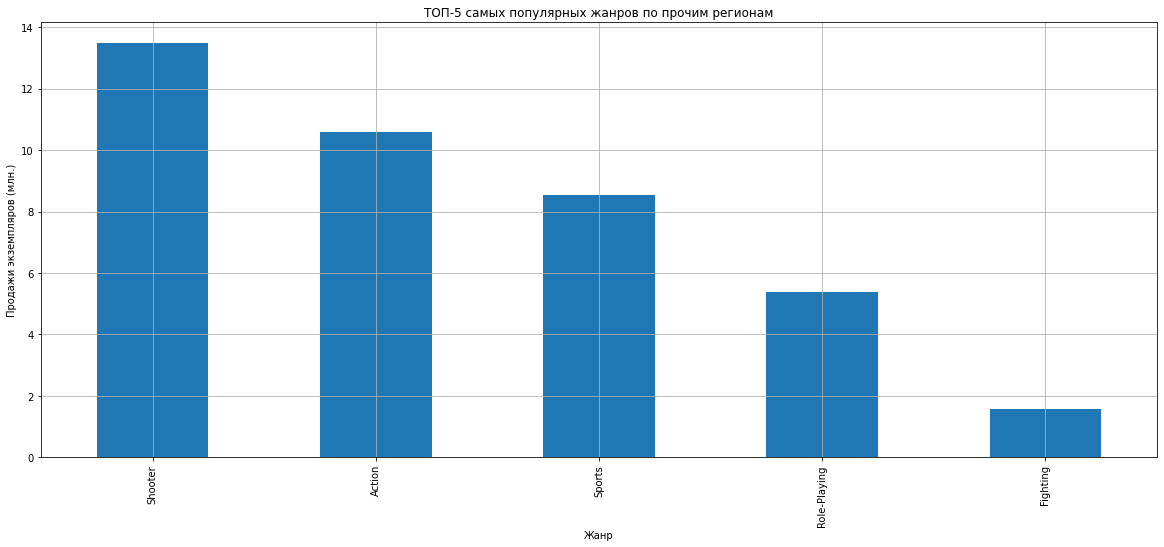

In [39]:
# ТОП-5 самых популярных жанров в  прочим регионам 
#группируем по жанрам
genre_other = data_all_pl.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
genre_other.plot(x = 'genre', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров по прочим регионам')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

***Доли продаж в разрезе жанров по регионам за 2015-2016гг.***

In [40]:
#доли продаж по жанрам по всем регионам
genre_count_full = data_all_pl.groupby('genre')['total_sales'].sum()

#группируем по жанрам
genre_na = data_all_pl.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_percent_na = (genre_na /(data_all_pl['na_sales'].sum())) * 100
display('Доля продаж в Северной Америке:')
display(genre_percent_na.sort_values(ascending=False).head(5))

genre_eu = data_all_pl.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_percent_eu = genre_eu / (data_all_pl['eu_sales'].sum()) * 100
display('Доля продаж в Европе:')
display(genre_percent_eu.sort_values(ascending=False).head(5))

genre_jp = data_all_pl.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
genre_percent_jp = genre_jp / (data_all_pl['jp_sales'].sum()) * 100
display('Доля продаж в Японии:')
display(genre_percent_jp.sort_values(ascending=False).head(5))

genre_other = data_all_pl.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
genre_percent_other = genre_other / (data_all_pl['other_sales'].sum()) * 100
display('Доля продаж по прочим регионам:')
display(genre_percent_other.sort_values(ascending=False).head(5))

'Доля продаж в Северной Америке:'

genre
Shooter         31.741221
Action          22.188550
Sports          17.333158
Role-Playing    13.057514
Misc             3.676131
Name: na_sales, dtype: float64

'Доля продаж в Европе:'

genre
Shooter         27.227254
Action          23.536569
Sports          18.804921
Role-Playing    11.633094
Racing           4.407192
Name: eu_sales, dtype: float64

'Доля продаж в Японии:'

genre
Action          43.164794
Role-Playing    25.112360
Shooter          7.097378
Misc             5.973783
Adventure        4.157303
Name: jp_sales, dtype: float64

'Доля продаж по прочим регионам:'

genre
Shooter         30.096004
Action          23.621344
Sports          19.089082
Role-Playing    12.011610
Fighting         3.505247
Name: other_sales, dtype: float64

***Вывод***
Shooter -  сыамый популярный жанр в регионах Северной Америки, Европы и прочих регионов.
Далее идет жанр Action - он занимает 2 место по регионам Северной Америки, Европы, прочих регионов и 1 место по Японии.
На 3 месте по популярности идет жанр Sport -  в Северной Америке,Европе и прочих регонах.
Следоватьо именно на эти 3 жанра стоит сделать акцент при планировании игр на будущее.


***Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе?***

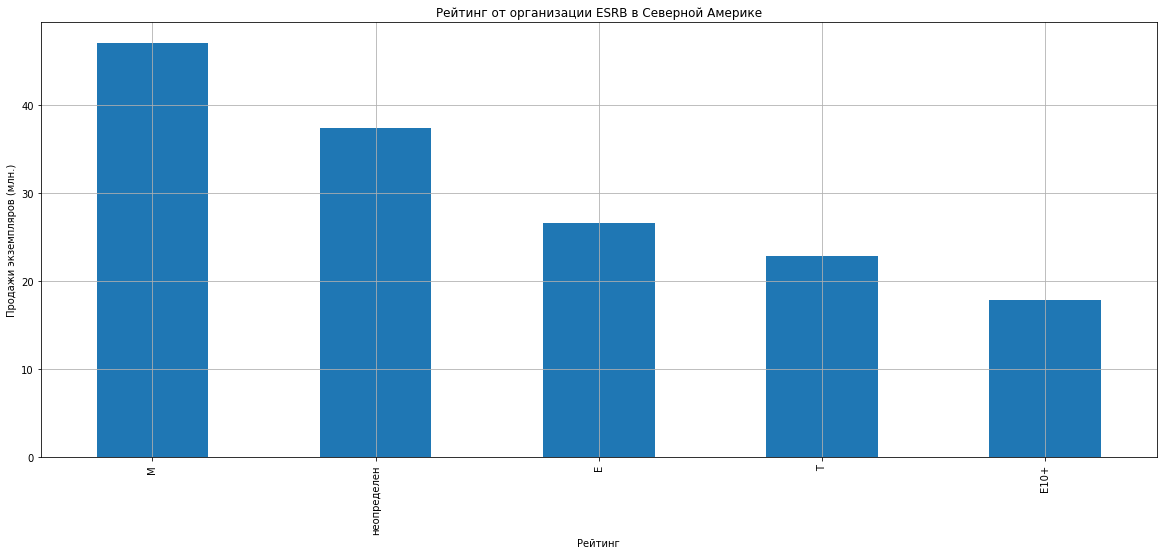

In [41]:
#  Рейтинг от организации ESRB в Северной Америке
#группируем по рейтингу
rating_na = data_all_pl.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке самые высокие рейтинги у жанра M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее по популярности игры, в которых жанры неопределенны. Остальные жанры менее популярные.

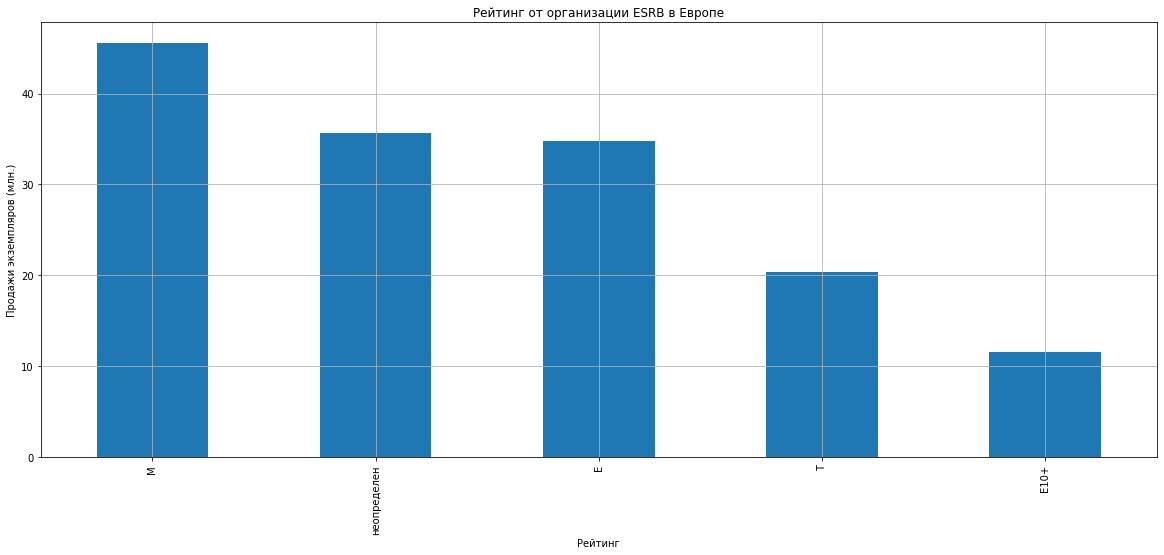

In [42]:
# Рейтинг от организации ESRB в Европе
#группируем по жанрам
rating_eu = data_all_pl.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Европе самые высокие продажи у игр с рейтингом  M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее по популярности игры рейтинг,  в которых неопределен, потом идут игры с рейтингом Е. Остальные жанры менее популярные.

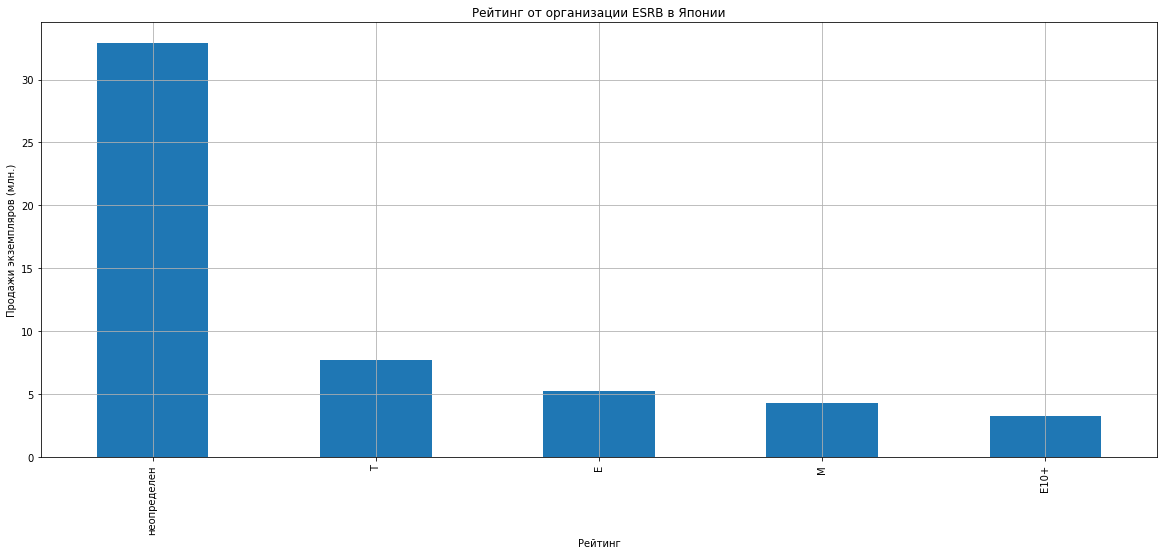

In [43]:
# Рейтинг от организации ESRB в Японии
#группируем по жанрам
rating_jp = data_all_pl.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Японии самые высокие рейтинги у игр, в которых жанры неопределенны, далее по популярности жанр M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет). Остальные жанры менее популярные.

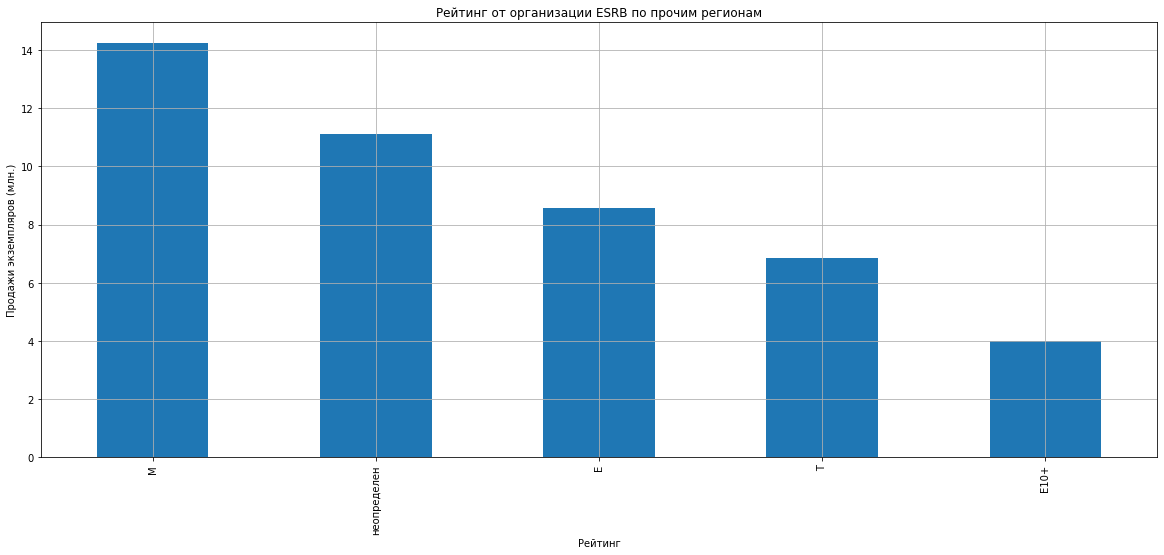

In [44]:
# Рейтинг от организации ESRB по прочим регионам
#группируем по жанрам
rating_other = data_all_pl.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_other.plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB по прочим регионам')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

По прочим регионам самые высокие продажи у игр с рейтингом M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее по популярности игры рейтинг, в которых неопределен, потом идут игры с рейтингом Е. Остальные жанры менее популярные.

***Вывод***

В этой части выделим ТОП-5 самых популярных и непопулярных платформ и жанров.
Можем выделить, что каждый регион отличается топовыми позициями. Для примера разберем первые места.

По нашей таблице:

Рейтинг по платформам:
в Северной Америке - PS4
в Европе - PS4
в Японии - 3DS
в других странах - PS4

Рейтинг по жанрам:
в Северной Америке - Shooter
в Европе - Shooter
в Японии - Action
в других странах - Shooter

Рейтинг от организации ESRB:
в Северной Америке - M
в Европе - M
в Японии - жанр неопределён
в других странах - M

Более подробно расписано в процессе отчетых выше.

***ПРОВЕРКА ГИПОТЕЗ***

Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  
Пороговое значение alpha =0.05

В данном случае возможно применить t-тест, так как:
- так как данных в выборке у нас более 20-30, то выборочные средние распределены нормально,
- выбранные для анализа 2 совокупности,

**По проверке гипотез нам необходимо сравнить средние двух генеральных совокупностей. Для этогов  Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:**

**код этого метода: scipy.stats.ttest_ind (array1, array2, equal_var)**

***Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC  2015-2016 гг. одинаковые***

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы беремследующее:

- H0: средние рейтинги по платформам одинаковые
- H1: средние рейтинги по платформам разные

In [45]:
# убираем значения, которые были пропусками
data_all_pl_user_score = data_all_pl[data_all_pl['user_score'] != 0]

#выборки по необходимым платформам
data_xbox = data_all_pl_user_score[data_all_pl_user_score['platform'] == 'XOne']
data_pc = data_all_pl_user_score[data_all_pl_user_score['platform'] == 'PC']

#обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_1 = data_xbox['user_score']
pc_1 = data_pc['user_score']

#критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу
alpha = 0.05

results = st.ttest_ind(xbox_1,pc_1)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Таким образом  нулевую гипотезу не отвергаем

***Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные***

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы берем следующее:

- H0: средние рейтинги по жанрам одинаковые
- H1: средние рейтинги по жанрам разные

In [46]:
#выборки по необходимым платформам
data_action = data_all_pl_user_score[data_all_pl_user_score['genre'] == 'Action']
data_sports = data_all_pl_user_score[data_all_pl_user_score['genre'] == 'Sports']
action_1 = data_action['user_score']
sports_1 = data_sports['user_score']

alpha = 0.05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(action_1, sports_1)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0012846807938657e-13
Отвергаем нулевую гипотезу


***Вывод***

В первой гипотезе:

Результат говорит о том, что нулевая гипотеза, что пользовательские рейтинги платформ Xbox One и PC 2015-2016 гг. одинаковые, не отвергается.

p-значение: 0.2778542084733835

Во второй гипотезе:

Результат говорит о том, что нулевая гипотеза отвергается.

p-значение: 1.0012846807938657e-13

Соотвестственно, соответственно не отвергается альтернативная гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные

***ОБЩИЙ ВЫВОД ПО ПРОЕКТУ***

По итогам можно сделать прогноз для планируемой кампании на  2017 год в игровой индустрии.

Был анализирован период с 2015-2016 года, и в этот период для диагностики были выбраны 2 платформы: PS4 и XOne, так как на выбранный период времени они обладали самыми большими продажами и, соответственно, были в тренде.

Самыми популярными платформами на рынке в мире являются - PS4, т.к. из из всех стран, в Японии более всего использоали платформу 3DS. 

Большинство пользователей по регионам склоняется к жанру Shooter. Также в ТОП жанров попали такие как Action (в Японии).

В ТОП рейтинг от организации ESRB можно твердо считать категорию M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).

На следующий год развивать следует  платформу PS4, т.к. она популярна в большинстве стран мира. В жанрах ТОП Shooter, но не следуем  забывать про остальные два жанра - Action и Sport, т.к. они захватывают 2 крупнейших региона  по выручке - Северную Америку и Европу. И акцент делать на возрастная категория M пользуется большим спросом на рынке.